In [31]:
import networkx as nx
import random as rn
import numpy as np
import matplotlib.pyplot as plt
import copy

## 1. Experimentally confirm the theoretical threshold for when an epidemic will persist in a random network — equation (18.28) in the textbook.
Do Sayama Exercise 18.5. You will need to modify the update() function from
code 16.6 (combined with the initialize() and observe() functions from code
16.5) in order to do this. The required modification is to turn the asynchronous
update function from 16.6 into a synchronous update function — so, rather than
selecting nodes at random, make sure you loop through all nodes and neighbors
in the graph.


The theoretical threshold for when an epidemic will persist in the network can be written as:

p_i > p_r/< k >

where < k > is the average node degree, p_i is the infection probability and p_r is the recovery probability.

To test this hypothesis we will run the simulation for different cases, one where the it should persist and one where it should not, and see if the theoretical agrees with the simulation.

1. Specifically, we run it for a p_i = p_r. Because we have a positive < k >, p_i > p_r/< k > and we expect the epidemic to persist.
2. Further, we run it for a small p_i relative to p_r/< k >. Here we expect the infection to die out.

In [9]:
# code from https://github.com/cscheffler/sayama-networkx-2/blob/master/chapter-16/16.5.py

def initialize(n, p_e):
    global g, density_history
    density_history = []
    g = nx.erdos_renyi_graph(n, p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rn.random() < 0.5 else 0

def observe():
    global g
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = nx.spring_layout(g), cmap='binary', edgecolors='black')
    
def observe_proportion():
    pass

In [34]:
#Synchronous aupdate function

def update(p_i, p_r):
    global g
    #Make copy to store updates on
    
    next_g = copy.deepcopy(g)
    for a in g.nodes:
        # if susceptible
        if g.nodes[a]['state'] == 0:
            for b in g.neighbors(a):
                # if neighbor b is infected
                if g.nodes[b]['state'] == 1:
                    next_g.nodes[a]['state'] = 1 if rn.random() < p_i else 0
        #If infected
        else: 
            next_g.nodes[a]['state'] = 0 if rn.random() < p_r else 1
    
    #Make next_g current g
    g = next_g.copy()
    #Store the proportion of infected in the network
    density_history.append(sum(g.nodes[i]['state'] for i in g.nodes) / len(g.nodes))

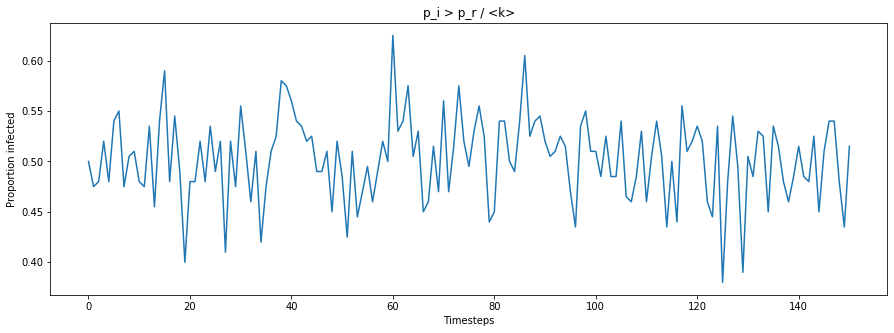

In [41]:
initialize(200, 0.1)
for i in range(0, 151):
    update(p_i=0.5, p_r=0.5)

plt.figure(figsize=(15, 5))
plt.plot(density_history)
plt.title("p_i > p_r / <k>")
plt.xlabel("Timesteps")
plt.ylabel("Proportion infected")
plt.show()

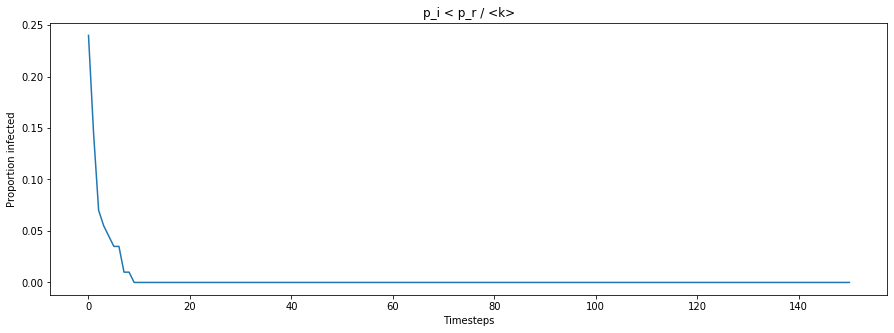

In [40]:
initialize(200, 0.1)
for i in range(0, 151):
    update(p_i=0.01, p_r=0.5)

plt.figure(figsize=(15, 5))
plt.plot(density_history)
plt.title("p_i < p_r / <k>")
plt.xlabel("Timesteps")
plt.ylabel("Proportion infected")
plt.show()

### b. Question: Why does using synchronous or asynchronous updating make a difference?
In the asynchronous updating, the state of one node can at most be changed at every timestep. In the synchronous, the state of multiple nodes can change at every time step. Consequently, we would expect the disease to propagate through the network faster in a synchrounous updating scheme.

### c. Question: For the mean field approximation described in Section 18.5, why is it appropriate to use the synchronous update method and not the asynchronous one?

The mean-field approximation completely disregards the specific configuration of the network or any individual nodes therein. It makes the assumption that every node can be affected at any time (subject to the specific update rules, of course). This is not compatible with asynchronous, which updates one by one, but it is with synchronous.

# Experimentally confirm the "your friends have more friends than you do" observation from pp421–422 in the textbook.

Generate a random network with 1000 nodes and (approximately) 20,000 edges, so that the average degree of a node is 40. Do this for each of the following types of random networks and compare your observations:
* Erdős-Renyi
* Watts-Strogatz
* Barabási-Albert 

random graphs. 

1. Write code to compute the average degree (which should be 40 — this is just to confirm that you generated the graph correctly).

2. Write code to compute the average degree of each neighbor in the graph. To loop through all neighbors in the graph, loop through all edges and then through each node attached to an edge.

In [19]:
#Make the graphs
er = nx.erdos_renyi_graph(1000, .04)
print("erdos_renyi_graph:", nx.info(er))

erdos_renyi_graph: Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 20206
Average degree:  40.4120


In [25]:
ws = nx.watts_strogatz_graph(1000, 40, .5)
print("watts_strogatz_graph", nx.info(ws))

watts_strogatz_graph Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 20000
Average degree:  40.0000


In [27]:
ba = nx.barabasi_albert_graph(1000, 20)
print("barabasi_albert:", nx.info(ba))

barabasi_albert: Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 19600
Average degree:  39.2000


In [29]:
def average__neighbour_degree(g):
    '''
    To loop through all neighbors in the graph,
    loop through all edges and then through each node attached to an edge.
    '''
    nodes = 0
    edges = 0
    for edge in g.edges():
        for neighbour in edge:
            nodes += 1
            edges += len(g.edges(neighbour))
    return edges / nodes

print("Average Neigbour Degrees")
print("erdos_renyi_graph:", average__neighbour_degree(er))
print("watts_strogatz_graph", average__neighbour_degree(ws))
print("barabasi_albert:", average__neighbour_degree(ba))

Average Neigbour Degrees
erdos_renyi_graph: 41.3874591705434
watts_strogatz_graph 40.35985
barabasi_albert: 61.894285714285715


In both er and ws, the average neighbour degree is only slightly higher than the average node degree. In the ba, the average neighbour degree is 50% higher than the average node degree. This is an example of the friendship paradox. In our average neighbour computation it can be explained by us visiting nodes with high degree a larger number of times as those nodes will be in the set of neighbours for more nodes.